# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Importing data](#Section3)<br>
4. [Importing VGG16 model for Feature extraction](#Section4)<br>
 4.1 [Import the VGG16 pretrained model](#Section4.1)<br>
 4.2 [Create feature extractor for train, test and validation](#Section4)<br>
5. [Modelling](#Section5)<br>
 5.1.[Building the model](#Section5.1)<br>
 5.2.[Train the model with train_feature and train_labels](#Section5.2)<br>
6. [Model Evaluation](#Section6)<br>
7. [Inferenece from model](#Section7)<br>
8. [Conclusion](#Section8)<br>

#### Flower classfication

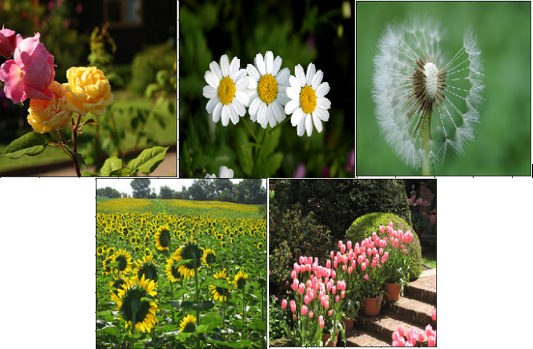

<a id = Section1></a>

# **1. Introduction**

Here, we will deal with **image classification problem** namely **Flower Species Recognition**, which is a hard problem because there are millions of flower species around the world. As we know machine learning is all about learning from past data, we need huge dataset of flower images to perform real-time flower species recognition. <br>

This is typically a **supervised learning problem** where we humans must provide training data (set of images along with its labels) to the machine learning model so that it learns how to discriminate each image (by learning the pattern behind each image) with respect to its label.<br>

We will not train whole convolutional network ourselves but we will use pre-trained network i.e. **VGGNnet** that is trained on Imagenet dataset. We will see whether to use this network for **feature extractor** or as an initial network for fine tune. VGGNet is great because it's simple and has great performance. 

If we use VGGNet for feature extraction, it means we have to use models in two parts, Convolutional base and classfier. 

<a id = Section2></a>

# 2. Problem Statement

Plant or Flower Species Classification is one of the most challenging and difficult problems in Computer Vision due to a variety of reasons e.g. collecting plant/flower dataset is time consuming task, flower like sunflower may look similar to Daffodil causing inter-class variation problem, sometimes single sunflower image might have differences within its class itself causing intra-class problem. Again segmenting the flower region from an image is a challenging task for CNN becuase it need to undetstand to remove unwanted background and take only foreground object for learning.<br>   

Considering all above problems, suppose we have a dataset given, covering iamges of **five classes of flowers: daisy (chamomile), tulip, rose, sunflower, dandelion**, we are asked to build a CNN model that will be trained with this dataset and should predict the lable/class of the flower accurately.

<a id = Section3></a>

# 3. Importing data

We will be using flower data as below

1. Training set with **400** samples of each class, it means total **2000** samples
2. Validation set with **150** samples of each class, it means total **750** samples
3. Test set with **150** samples of each class, it means total **750** samples

The main challenge was to get data of each class, possibly in equal proportion for each class. Furthermore, data should be enough for each set i.e. Training, validation and test and we have overcome both these hurdles.

We will check below the paths for each type of set and class.



#### Opening and Creating file path

- Check out the file path for both __train__  __test__ and __validation__.

In [1]:
# Base variables
import os
base_dir = r'G:\CV2\flowers'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_rose_dir = os.path.join(train_dir, 'rose')
train_tulip_dir = os.path.join(train_dir, 'tulip')
train_sunflower_dir = os.path.join(train_dir, 'sunflower')

test_daisy_dir = os.path.join(test_dir, 'daisy')
test_dandelion_dir = os.path.join(test_dir, 'dandelion')
test_rose_dir = os.path.join(test_dir, 'rose')
test_tulip_dir = os.path.join(test_dir, 'tulip')
test_sunflower_dir = os.path.join(test_dir, 'sunflower')


train_size, validation_size, test_size = 2000, 750, 750

print('Train_daisy_directory {}'.format(train_daisy_dir))
print('Train_dandelion_directory {}'.format(train_dandelion_dir))
print('Train_rose_directory {}'.format(train_rose_dir))
print('Train_tulip_directory {}'.format(train_tulip_dir))
print('Train_sunflower_directory {}'.format(train_sunflower_dir))

print('-------------'*3)

print('Train_directory {}'.format(train_dir))
print('Test_directory {}'.format(test_dir))
print('Validation_directory {}'.format(validation_dir))

print('-------------'*3)

print('Test_daisy_directory {}'.format(test_daisy_dir))
print('Test_dandelion_directory {}'.format(test_dandelion_dir))
print('Test_rose_directory {}'.format(test_rose_dir))
print('test_tulip_directory {}'.format(test_tulip_dir))
print('test_sunflower_directory {}'.format(test_sunflower_dir))

img_width, img_height = 224, 224  # Default input size for VGG16

Train_daisy_directory G:\CV2\flowers\train\daisy
Train_dandelion_directory G:\CV2\flowers\train\dandelion
Train_rose_directory G:\CV2\flowers\train\rose
Train_tulip_directory G:\CV2\flowers\train\tulip
Train_sunflower_directory G:\CV2\flowers\train\sunflower
---------------------------------------
Train_directory G:\CV2\flowers\train
Test_directory G:\CV2\flowers\test
Validation_directory G:\CV2\flowers\validation
---------------------------------------
Test_daisy_directory G:\CV2\flowers\test\daisy
Test_dandelion_directory G:\CV2\flowers\test\dandelion
Test_rose_directory G:\CV2\flowers\test\rose
test_tulip_directory G:\CV2\flowers\test\tulip
test_sunflower_directory G:\CV2\flowers\test\sunflower


### Opening and Writing to Image Files

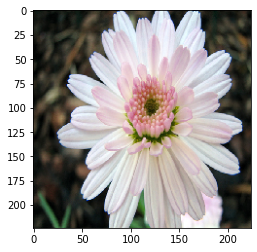

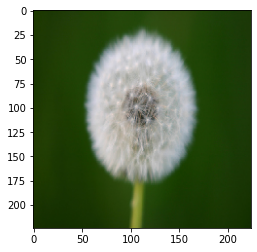

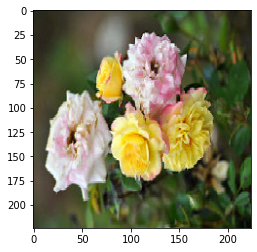

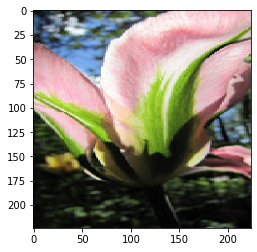

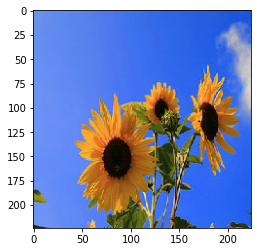

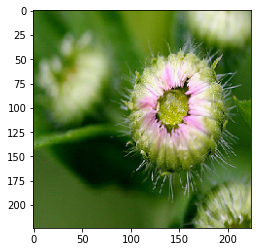

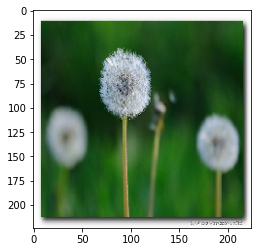

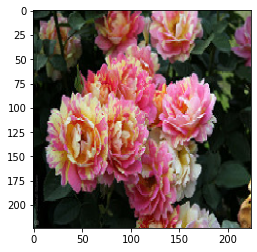

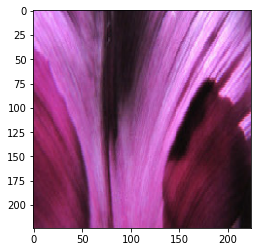

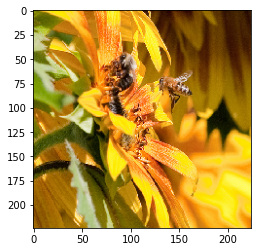

In [2]:
# Show pictures
import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    #plt(5,2)
    plt.show()
    
    
    
# p=r'C:\Users\vinay\Desktop\Notes\cat vs dog\blog\dogs_cats\data\train\cats'
for i in range(0,2):
    show_pictures(train_daisy_dir)
    show_pictures(train_dandelion_dir)
    show_pictures(train_rose_dir)
    show_pictures(train_tulip_dir)
    show_pictures(train_sunflower_dir)

    

<a id = Section4></a>

# 4. Importing VGG16 model for Feature extraction

**Let's take an approach to use the convolutional base to extract features, using them to train a classifier to classify the input image as per the class of the flower.** 


We can now check the architecture of the convolutional base that we instantiated.

### Import the VGG16 pretrained model

In [3]:
# Instantiate convolutional base
from keras.applications import VGG16

In [4]:
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))   

### Printout the model summary of the pre-trained model.

In [5]:
# Lets Check architecture of the VGGNet
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Create feature extractor for train, test and validation.

We will pass our images through **convolutional base** for feature extraction. <br>
We are using **ImageDataGenerator** utility that will use **DirectoryIterator** yielding tuples of **(x, y)** where x is a numpy array containing a **batch of images** with shape **(batch_size, *target_size, channels)** and **y** is a numpy array of corresponding **label**

In [9]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))   
    labels = np.zeros(shape=(sample_count, 5))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size)
                                            #class_mode=None)
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, train_size)   
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 2000 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


### Now printout the dtypes of train_features and train_lables.

In [12]:
# Debug
print(train_features.dtype)
print(train_labels.dtype)

float64
float64


<a id = Section5></a>

# 5. Modelling


Here we will see how to build a classifier based on fully-connected layers. This classifier will use the features extracted from the convolutional base.

<a id = Section5.1></a>

### 5.1 Building the model

#### Now we build a fully-connected layer model with activation function "Relu" and Number of training epochs 20.

In [23]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 20

model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 1285      
Total params: 6,424,069
Trainable params: 6,424,069
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['acc'])

<a id = Section5.2></a>
### 5.2 Train the model with train_feature and train_labels.

In [25]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
63/63 [==============================] - 3s 42ms/step - loss: 1.6725 - acc: 0.5475 - val_loss: 0.8119 - val_acc: 0.7013
Epoch 2/20
63/63 [==============================] - 2s 39ms/step - loss: 0.5357 - acc: 0.8115 - val_loss: 0.6481 - val_acc: 0.7693
Epoch 3/20
63/63 [==============================] - 2s 37ms/step - loss: 0.3459 - acc: 0.8855 - val_loss: 0.7220 - val_acc: 0.7533
Epoch 4/20
63/63 [==============================] - 2s 39ms/step - loss: 0.2484 - acc: 0.9200 - val_loss: 0.5938 - val_acc: 0.7867
Epoch 5/20
63/63 [==============================] - 2s 39ms/step - loss: 0.1808 - acc: 0.9450 - val_loss: 0.5849 - val_acc: 0.7867
Epoch 6/20
63/63 [==============================] - 2s 39ms/step - loss: 0.1294 - acc: 0.9675 - val_loss: 0.6001 - val_acc: 0.7853
Epoch 7/20
63/63 [==============================] - 3s 40ms/step - loss: 0.0983 - acc: 0.9780 - val_loss: 0.7021 - val_acc: 0.7787
Epoch 8/20
63/63 [==============================] - 2s 38ms/step - loss: 0.0774 - a

In [26]:
# Save model
model.save('flowers_fcl.h5')

<a id = Section6></a>

# 6. Model Evaluation 
Lets see how model is performing and check whether it needs any improvement

### Learning curves

In [27]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

### Plot the training and validation accuracy

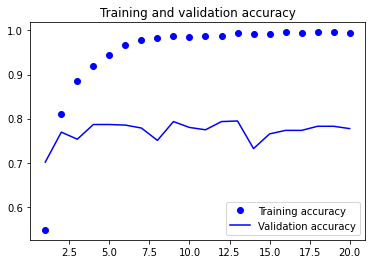

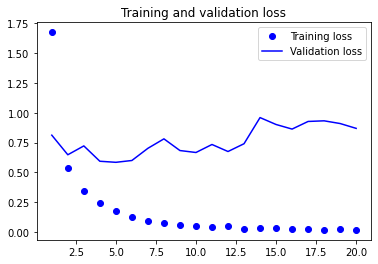

In [28]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


<a id = Section7></a>

# 7. Inference from models

### Visualize the prediction for flower categories.

Here, we will choose random samples from test dataset directory  for prediction

In [46]:
# Define function to visualize predictions
def visualize_predictions(classifier, n_cases):
    for i in range(0,n_cases):
        path = random.choice([test_daisy_dir, test_dandelion_dir, test_rose_dir,
                             test_tulip_dir, test_sunflower_dir])

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = np.argmax(classifier.predict(features), axis = 1)
        except:
            prediction = np.argmax(classifier.predict(features.reshape(5, 7*7*512)), axis = 1)

        # Show picture
        plt.imshow(img_tensor)
        plt.show()

        # Write prediction
        if prediction == 0:
            print('daisy')
        if prediction == 1:
            print('dandelion')
        if prediction == 2:
            print('rose')
        if prediction == 3:
            print('sunflower')
        if prediction == 4:
            print('tulip')


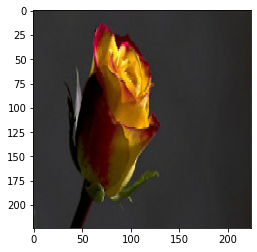

rose


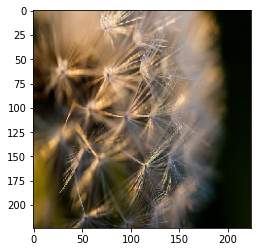

dandelion


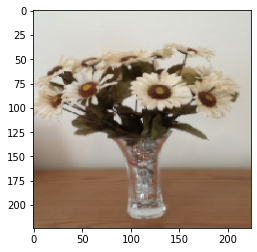

daisy


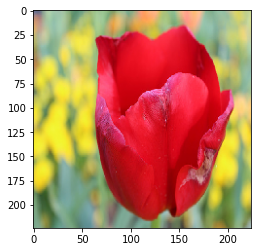

rose


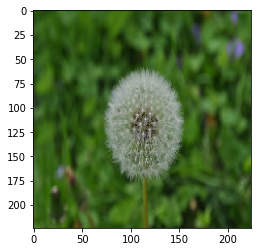

dandelion


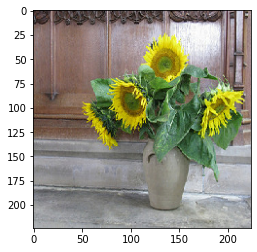

sunflower


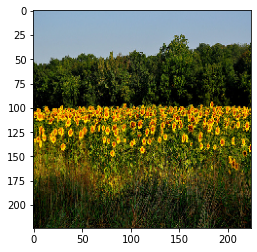

sunflower


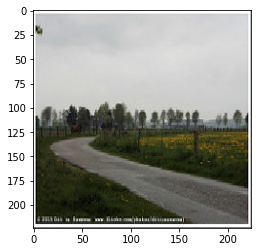

daisy


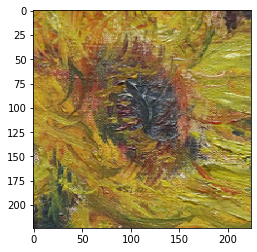

dandelion


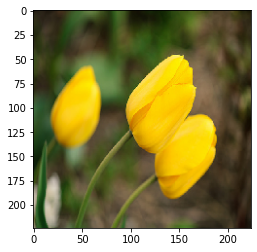

tulip


In [47]:
# Visualize predictions
visualize_predictions(model, 10)

<a id = Section8></a>
# **8. Conclusion**

- We arranged the dataset of **flower species** with sufficient data points for each of the **5 classes**. For each kind of data set, we created different **directory folders** to make it easy for importing it for feature extractions. 5 classes includes **Dandelion, daisy, rose, sunflower and tulip**. 
- We used **ImageDataGenerator** class utility of keras with **flow_from_directory** method to convert our raw data on disk to **tf.data.Dataset** object that can be used to train a model. This will help our model to make **robust** by applying **random transformation** on training images
- We used **pre-trained model VGG16** for extracting features out of the input images and further we used **fully connected dense layer** for final classification of flower species. 
- Model training gives an accuracy of about **78%** on **validation dataset** which is not either bad nor too good for prediction purpose. 
- We finally tried to make out **inferences** from models by passing random number to select **random images** from test data set and then to predict the class of each of the randomly picked image of flower followed by visualizing the images. 
